In [1]:
# 구글드라이브에서 데이터를 사용하기 위해서 Mount를 하는 코드입니다.
# 구글 계정으로 로그인하여, 구글드라이브에 있는 실습용 데이터를 사용할 수 있게 인증하는 방식입니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실습용 데이터셋이 있는 경로입니다. (*** 구글드라이브 내 경로 ***)
# 본인의 경로에 맞게 수정해서 사용하세요. (자세한 사용법은 함께 제공되는 튜토리얼 영상을 확인하세요)
base_path = "/content/drive/MyDrive/Colab Notebooks/[초격차] 데이터 분석/input"

In [3]:
# 정형 데이터를 불러오고 조작하기 위해 Pandas 라이브러리를 사용합니다.
import pandas as pd
# 지정한 경로에 있는 데이터를 불러옵니다. csv 파일이냐 xlsx 파일이냐에 따라 사용하는 함수가 다릅니다.
data = pd.read_excel(base_path + "/#14_GA_market_data.xlsx", header=6)
data

,Client Id,Sessions,Avg. Session Duration,Bounce Rate,Revenue,Transactions,Goal Conversion Rate
0,9.260054e+08,11,00:03:10,0.4545,$262.74,2,0.8182
1,9.280010e+08,4,00:02:57,0.0000,$262.74,2,1.2500
2,9.284668e+08,4,00:10:05,0.5000,$262.74,2,1.7500
3,9.287016e+08,4,00:04:45,0.0000,$262.74,2,1.2500
4,9.299849e+08,5,00:05:46,0.4000,$262.74,2,1.0000
...,...,...,...,...,...,...,...
4267,9.580274e+08,2,00:11:44,0.0000,$3.53,2,3.5000
4268,5.991759e+08,2,00:06:16,0.0000,$3.51,2,3.5000
4269,7.383023e+08,7,00:03:14,0.0000,$3.51,2,1.0000
4270,6.500708e+07,4,00:13:34,0.0000,$1.76,2,1.7500


In [4]:
# 불러온 데이터셋에 대한 전반적인 정보를 확인하는 함수입니다.
# row수, column수, 결측치 수, column별 data type을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client Id              4272 non-null   float64
 1   Sessions               4272 non-null   int64  
 2   Avg. Session Duration  4272 non-null   object 
 3   Bounce Rate            4272 non-null   float64
 4   Revenue                4272 non-null   object 
 5   Transactions           4272 non-null   int64  
 6   Goal Conversion Rate   4272 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 233.8+ KB


In [5]:
# 데이터의 통계량을 확인합니다.
data.describe()

,Client Id,Sessions,Bounce Rate,Transactions,Goal Conversion Rate
count,4.272000e+03,4272.000000,4272.000000,4272.000000,4272.000000
mean,6.094035e+08,6.121255,0.086854,2.091760,1.884255
std,3.554070e+08,9.609334,0.169912,0.446645,1.051112
min,5.779692e+05,2.000000,0.000000,2.000000,0.089700
25%,2.995732e+08,2.000000,0.000000,2.000000,1.000000
50%,6.108342e+08,4.000000,0.000000,2.000000,1.750000
75%,9.256504e+08,7.000000,0.000000,2.000000,2.500000
max,1.256378e+09,312.000000,0.807700,9.000000,4.500000


In [6]:
# plotting을 위해 사용하는 parameter들을 사용자로부터 입력받습니다.

# x는 scatterplot의 x축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 x축에 표시하고 싶은 column의 이름을 입력하세요.
# x축 정보는 scatterplot이 나뉘는 기준입니다.
x = input("scatterplot의 x축이 되는 column을 입력하세요 : ")
# y는 scatterplot의 y축에 표현되는 feature를 의미합니다. data에 존재하는 column중에 y축에 표시하고 싶은 column의 이름을 입력하세요.
# y축 정보는 scatterplot에 들어가는 실제값입니다.
y = input("scatterplot의 y축이 되는 column을 입력하세요 : ")
# hue는 scatterplot에서 각 plot마다 색을 다르게 주는 기준이 되는 feature를 의미합니다. data에 존재하는 column중에 hue에 표시하고 싶은 column의 이름을 입력하세요.
# hue는 plot에서 색 정보를 통해서 구분되어 표현되는 column을 의미합니다.
hue = input("scatterplot의 색상 구분의 기준이 되는 column을 입력하세요 : ")

scatterplot의 x축이 되는 column을 입력하세요 : Bounce Rate
scatterplot의 y축이 되는 column을 입력하세요 : Goal Conversion Rate
scatterplot의 색상 구분의 기준이 되는 column을 입력하세요 : Transactions


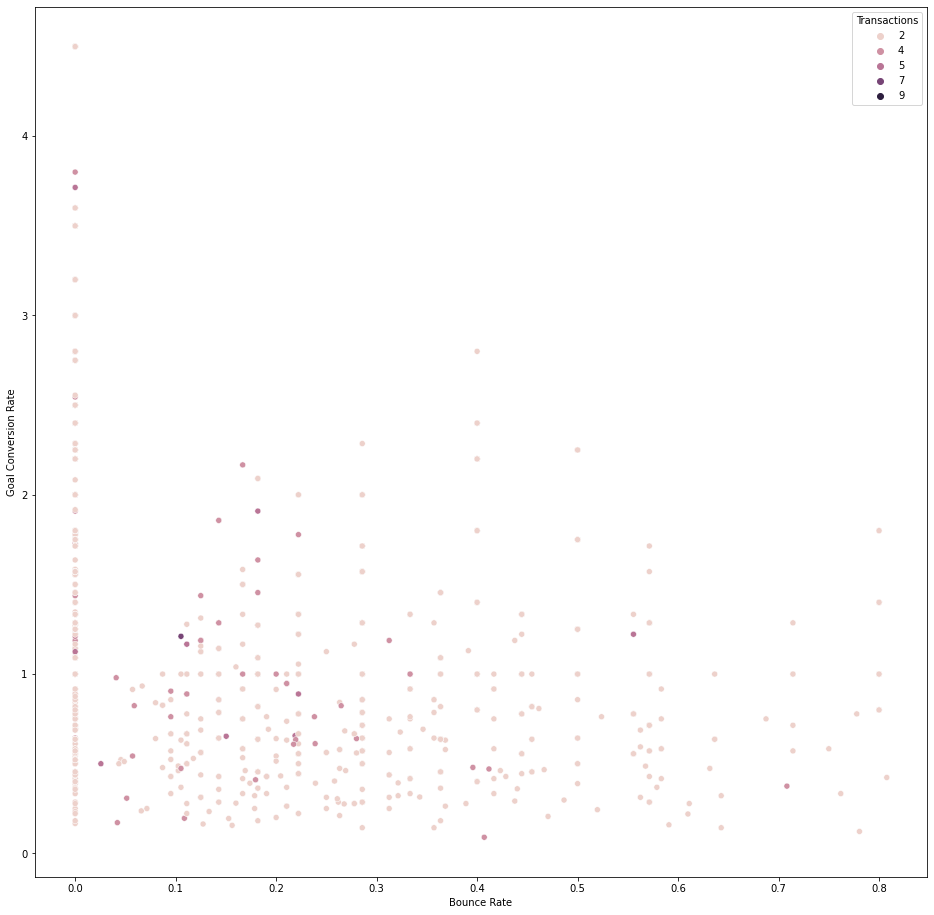

In [7]:
# 그래프를 출력할 때 필요한 설정을 해주는 matplotlib.pyplot을 불러옵니다.
import matplotlib.pyplot as plt
# scatterplot을 그려주는 라이브러리인 seaborn을 불러옵니다.
import seaborn as sns

# 출력할 plot의 크기를 정해줍니다. 16 x 16의 크기로 지정합니다.
plt.figure(figsize=(16, 16))
# 위에서 입력받은 x, y, hue를 기준으로 scatterplot을 그립니다.
sns.scatterplot(data=data, x=x, y=y, hue=hue)
# plot을 출력합니다.
plt.show()